# Exploratory Data Analysis (EDA) para el Sistema de Recomendación de Películas
Este análisis busca explorar los datos, detectar anomalías y visualizar patrones clave.


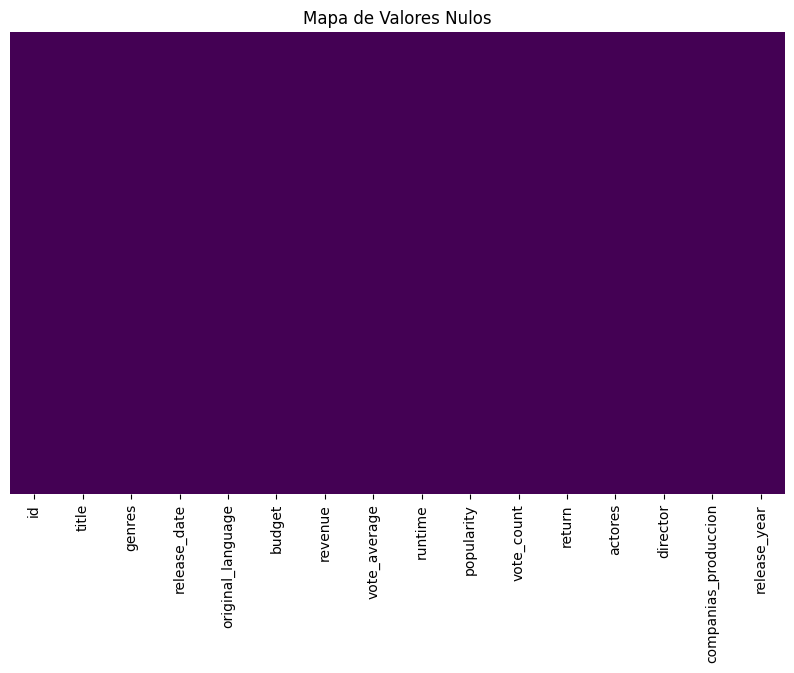

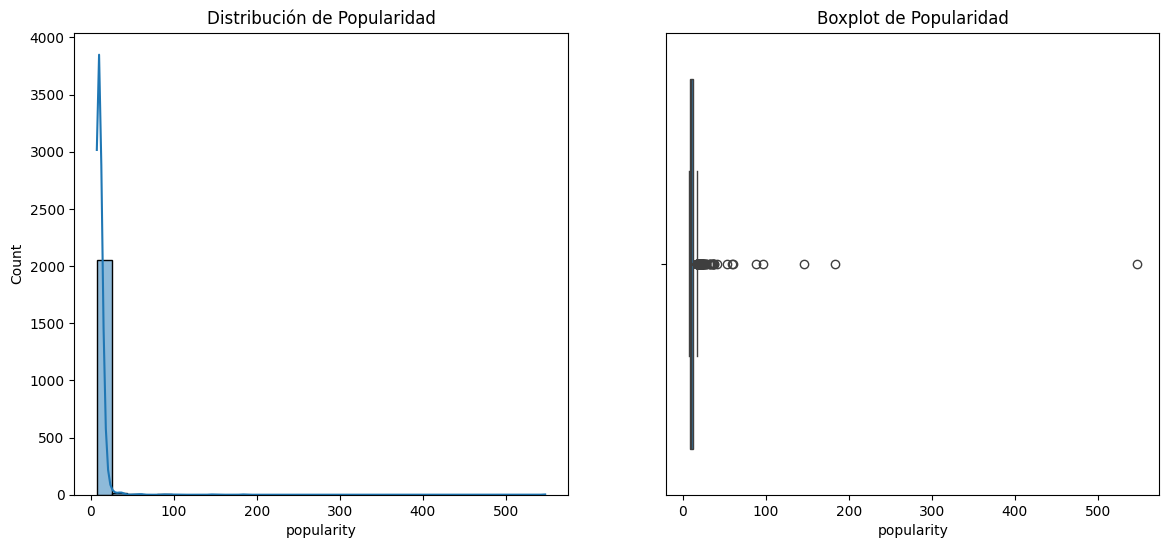

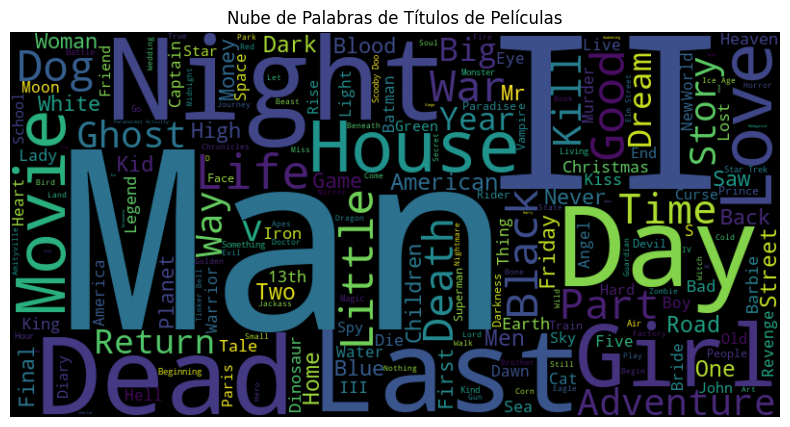

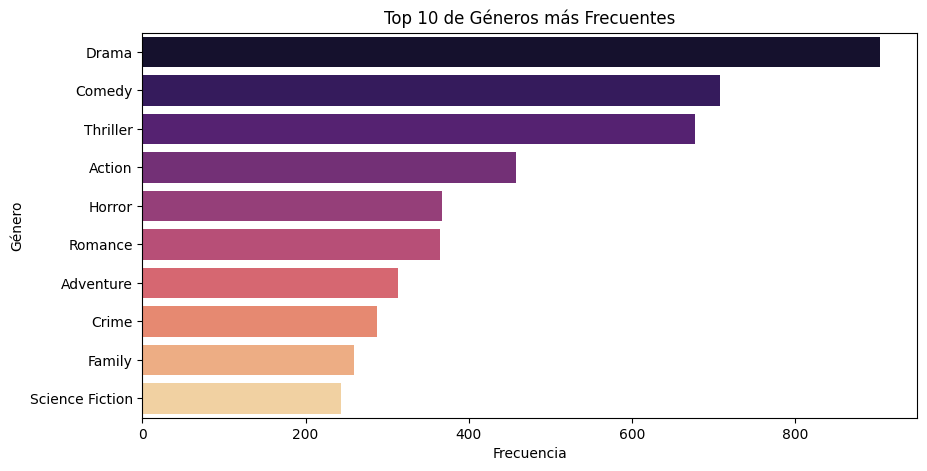

,Valores Nulos,Valores Duplicados,Tipos de Datos,Top 10 Géneros
0,"{'id': 0, 'title': 0, 'genres': 1, 'release_date': 0, 'original_language': 0, 'budget': 0, 'revenue': 0, 'vote_average': 0, 'runtime': 0, 'popularity': 0, 'vote_count': 0, 'return': 0, 'actores': 0, 'director': 0, 'companias_produccion': 0, 'release_year': 0}",0,"{'id': 'int64', 'title': 'object', 'genres': 'object', 'release_date': 'datetime64[ns]', 'original_language': 'object', 'budget': 'float64', 'revenue': 'float64', 'vote_average': 'float64', 'runtime': 'float64', 'popularity': 'float64', 'vote_count': 'int64', 'return': 'float64', 'actores': 'object', 'director': 'object', 'companias_produccion': 'object', 'release_year': 'int64'}","Drama (905), Comedy (708), Thriller (677), Action (458), Horror (367), Romance (365), Adventure (313), Crime (288), Family (260), Science Fiction (243)"


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display

# Introducción
print("# Exploratory Data Analysis (EDA) para el Sistema de Recomendación de Películas")
print("Este análisis busca explorar los datos, detectar anomalías y visualizar patrones clave.")

# Cargar el dataset
df = pd.read_csv("./dataset_final_sin_peliculas_excesivamente_largas.csv", parse_dates=["release_date"])

# Chequeo de valores nulos
missing_values = df.isnull().sum()

# Chequeo de valores duplicados
duplicates = df.duplicated().sum()

# Tipos de datos
data_types = df.dtypes.astype(str)

# Análisis estadístico
descriptive_stats = df.describe()

# Análisis de correlaciones (solo columnas numéricas)
correlation_matrix = df.select_dtypes(include=["number"]).corr()

# Visualización de nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Valores Nulos')
plt.show()

# Distribución de Popularidad
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Popularidad')
sns.boxplot(x=df['popularity'], ax=axes[1])
axes[1].set_title('Boxplot de Popularidad')
plt.show()

# Nube de palabras con títulos de películas
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()

# Top 10 de Géneros más Frecuentes
genres_series = df['genres'].str.split(', ').explode()
top_genres = genres_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='magma', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Top 10 de Géneros más Frecuentes')
plt.show()

# Crear Resumen del EDA en una Tabla
eda_summary_df = pd.DataFrame({
    "Valores Nulos": [missing_values.to_dict()],  # Convertir a diccionario legible
    "Valores Duplicados": [duplicates],  # Mantener como int
    "Tipos de Datos": [data_types.to_dict()],  # Diccionario limpio
    "Top 10 Géneros": [", ".join([f"{k} ({v})" for k, v in top_genres.items()])]  # String claro con los géneros y sus conteos
})

# Mostrar tabla de resumen en Jupyter Notebook
display(eda_summary_df)


## Conclusiones del EDA

El análisis exploratorio de datos permitió identificar y corregir diversas inconsistencias en el dataset, mejorando su calidad para el entrenamiento del sistema de recomendación.

### Principales Hallazgos:

- Valores nulos y duplicados: Se encontraron valores nulos en algunas columnas clave, como genres, que fueron tratados adecuadamente. Además, se verificó la presencia de registros duplicados, los cuales fueron eliminados para evitar sesgos en el modelo.
- Outliers en presupuesto e ingresos: Se detectaron valores extremadamente altos o bajos en budget y revenue, lo que indica la presencia de películas con presupuestos o ingresos atípicos. Para evitar que estos valores distorsionen el modelo de recomendación, se decidió no utilizarlos directamente en la construcción del sistema.
- Correlación entre variables: Se identificó una relación positiva entre popularity y vote_average, lo que sugiere que las películas con mayor popularidad suelen recibir mejores calificaciones. Este hallazgo valida la elección de estas variables como posibles indicadores de relevancia en las recomendaciones.
- Distribución de géneros: El género más frecuente en el dataset es Drama, seguido por Comedy y Thriller. Esto sugiere que los géneros predominantes pueden influir en la calidad y diversidad de las recomendaciones.
- Tendencias en títulos de películas: La nube de palabras mostró que términos como "love", "man", "girl" y "night" aparecen con frecuencia en los títulos. Esto podría utilizarse en futuras mejoras del sistema de recomendación, por ejemplo, para generar recomendaciones basadas en análisis de texto.

### Acciones Tomadas para Mejorar el Dataset:
1️⃣ Se eliminaron columnas irrelevantes y valores inconsistentes de los datasets originales.

2️⃣ Se filtraron únicamente películas en idioma inglés para mantener homogeneidad en el análisis.

3️⃣ Se desanidaron y procesaron columnas JSON para extraer géneros, actores y directores, facilitando su uso en el modelo.

4️⃣ Se creó un dataset final con 2076 películas, optimizado para el sistema de recomendación, asegurando un balance entre diversidad y relevancia en los datos.
